## Procesos de Fabricación Aeronáutica - Máster Universitario en Ingeniería Aeronáutica
### Problema de conformado de chapa, examen parcial 17/12/2019

<img src="SPIF_cone66.jpg" alt="SPIF_cono66.jpg" width='200'/>

La foto adjunta muestra una figura cónica de aluminio 7075-O de 1.6 mm de espesor fabricada mediante SPIF (_Single-Point Incremental Forming_). El comportamiento del material viene dado por la ley $\sigma_y = 300 \overline\varepsilon^{0.12}$. Antes del proceso de conformado, la chapa se marcó con un patrón de círculos de 2 mm de diámetro. Al final del proceso se produjo el fallo por fractura que puede apreciarse en la foto. Cerca de la grieta, los círculos deformados en elipses tienen unos semiejes mayor y menor de 5.6 y 2.2 mm, respectivamente. Suponga el criterio de plastificación de von Mises. Se pide calcular:

1. Espesor de la chapa y deformación efectiva en la zona cercana a la grieta.
2. Tensiones principales $\sigma_1$ y $\sigma_2$.
3. El límite de fallo en operaciones de conformado incremental está determinado por la reducción máxima del espesor. Determine la expresión de este criterio de fallo.
4. Represente en un diagrama de tensiones principales $\sigma_1$ vs. $\sigma_2$ la superficie de plastificación y el vector incremento de deformación plástica $d\varepsilon_{ij}^p$.
5. Represente en un diagrama $\varepsilon_1$ vs. $\varepsilon_2$ el criterio de fallo por fractura y el camino de deformaciones del material cerca de la grieta hasta producirse el fallo.

### Resolución con Python

In [ ]:
t0 = 1.6
K = 300
n = 0.12
σy = lambda εeff: K*εeff**n
d0 = 2
d1 = 5.6
d2 = 2.2

#### 1. Espesor de la chapa y deformación efectiva en la zona cercana a la grieta.

$$
\varepsilon_1 = \ln\frac{d_1}{d_0} \quad,\quad
\varepsilon_2 = \ln\frac{d_2}{d_0}
$$
$$
\varepsilon_3 = -(\varepsilon_1+\varepsilon_2)  \quad\rightarrow\quad t = t_0 \mathrm{e}^{\varepsilon_3}
$$
$$
\beta = \frac{\varepsilon_2}{\varepsilon_1}
$$
$$
\overline\varepsilon = \frac{2}{\sqrt{3}} \varepsilon_1 \sqrt{1+\beta+\beta^2}
$$


In [ ]:
import math
ε1 = math.log(d1/d0)
ε2 = math.log(d2/d0)
ε3 = -(ε1+ε2)
t = t0*math.exp(ε3)
beta = ε2/ε1
εeff = 2/math.sqrt(3)*ε1*math.sqrt(1+beta+beta**2)
print('ε1 = %.3f' % ε1)
print('ε2 = %.3f --> beta = %.3f' % (ε2, beta))
print('ε3 = %.3f --> t = %.3f mm' % (ε3, t))
print('εeff = %.3f' % εeff)

#### 2. Tensiones principales $\sigma_1$ y $\sigma_2$.

$$
\overline\sigma = 300 \overline\varepsilon^{0.12}
$$
$$
\alpha = \frac{2\beta+1}{2+\beta}
$$
$$
\sigma_1 = \frac{\overline\sigma}{\sqrt{1-\alpha+\alpha^2}} \quad,\quad
\sigma_2 = \alpha \sigma_1
$$


In [ ]:
σeff = σy(εeff)
alpha = (2*beta+1)/(2+beta)
σ1 = σeff/math.sqrt(1-alpha+alpha**2)
σ2 = alpha*σ1
print('σeff = %.1f MPa' % σeff)
print('alpha = %.3f' % alpha)
print('σ1 = %.1f MPa' % σ1)
print('σ2 = %.1f MPa' % σ2)

#### 3. El límite de fallo en operaciones de conformado incremental está determinado por la reducción máxima del espesor. Determine la expresión de este criterio de fallo.

El criterio puede expresarse como:
$$
\varepsilon_3^* = -1.125
$$
o bien como:

$$
\varepsilon_3^* = -(1+\beta)\varepsilon_1^* = -1.125 \quad\rightarrow\quad
\varepsilon_1^* = \frac{1.125}{1+\beta}
$$

#### 4. Represente en un diagrama de tensiones principales $\sigma_1$ vs. $\sigma_2$ la superficie de plastificación y el vector incremento de deformación plástica $d\varepsilon_{ij}^p$.

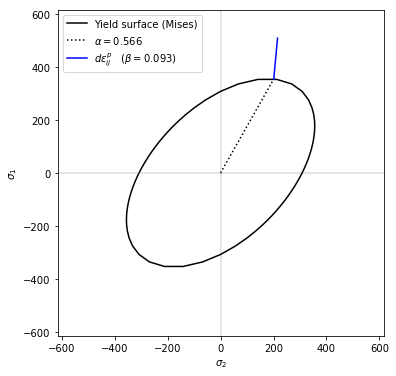

In [4]:
from fracture_SPIF_2019 import *
plot_stress(σeff, σ1, σ2, ε1, ε2)

#### 5. Represente en un diagrama $\varepsilon_1$ vs. $\varepsilon_2$ el criterio de fallo por fractura y el camino de deformaciones del material cerca de la grieta hasta producirse el fallo.

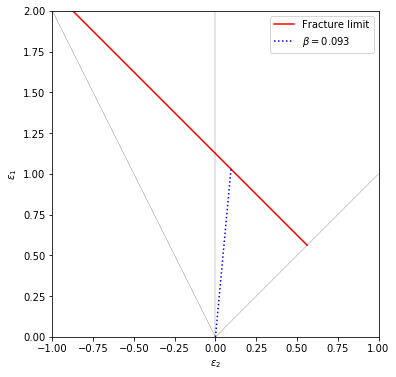

In [5]:
plot_strain(ε1, ε2)